In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [308]:
customer_df = pd.read_csv('E-commerce Customer Behaviour/E-commerce Customer Behavior - Sheet1.csv')
customer_df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [310]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [312]:
customer_df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [314]:
customer_df.duplicated().sum()

0

In [320]:
# Customer Segmentation: Analyze and categorize customers based on demographics, spending habits, and satisfaction levels.
avg_total_spend = customer_df.groupby(['City','Gender'])[['Total Spend']].mean().reset_index().sort_values(by='Total Spend', ascending=False)
avg_total_spend

,City,Gender,Total Spend
7,San Francisco,Male,1459.772414
6,New York,Male,1210.600000
5,New York,Female,1164.250000
2,Los Angeles,Male,805.491525
3,Miami,Female,730.400000
4,Miami,Male,689.687719
0,Chicago,Female,499.882759
1,Houston,Female,446.894828


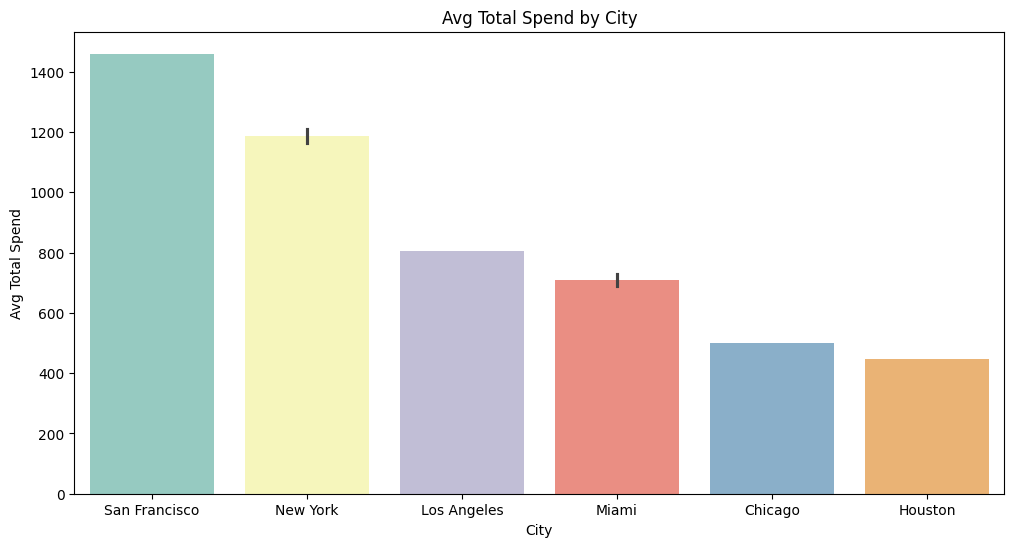

In [322]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_total_spend.City, y=avg_total_spend['Total Spend'], hue=avg_total_spend.City, palette='Set3')
plt.title('Avg Total Spend by City')
plt.xlabel('City')
plt.ylabel('Avg Total Spend')
plt.show()

## Observation
San Francisco has the highest average total expenditure, reflecting high involvement in online shopping among other cities. This can be explained by increased income levels, improved access to technology, and higher awareness of product variety and availability on e-commerce sites. New York also reflects relatively high average expenditure, further emphasizing high customer involvement in urban areas.
Targeted marketing campaigns, exclusive product launches, or premium service offerings could be introduced in cities like San Francisco and New York to further leverage their high spending behavior.

In [324]:
customer_df.Age.value_counts()

Age
30    48
32    33
43    25
27    25
31    25
35    25
36    25
34    24
37    24
41    24
28    24
29    11
33    10
42     9
26     9
38     9
Name: count, dtype: int64

In [326]:
def age_category(rows):
    if(rows.Age >= 25 and rows.Age <= 30):
        return '25-30'
    if(rows.Age >= 31 and rows.Age <=35):
        return '31-35'
    if(rows.Age >= 36 and rows.Age <= 40):
        return '36-40'
    if(rows.Age >= 41 and rows.Age <= 45):
        return '41-45'

In [328]:
customer_df['Age Category'] = customer_df.apply(age_category, axis = 1)
customer_df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Age Category
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied,25-30
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral,31-35
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied,41-45
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied,25-30
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied,25-30
...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied,31-35
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral,36-40
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied,25-30
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral,31-35


In [330]:
Avg_totalSpend_age = customer_df.groupby(['Age Category', 'Gender', 'Satisfaction Level'])[['Total Spend']].mean().reset_index()
Avg_totalSpend_age

,Age Category,Gender,Satisfaction Level,Total Spend
0,25-30,Female,Satisfied,1186.376000
1,25-30,Female,Unsatisfied,730.400000
2,25-30,Male,Neutral,780.900000
3,25-30,Male,Satisfied,1460.456140
4,25-30,Male,Unsatisfied,702.878788
5,31-35,Female,Neutral,450.600000
6,31-35,Female,Satisfied,1147.487879
7,31-35,Male,Neutral,802.142000
8,31-35,Male,Satisfied,871.844444
9,31-35,Male,Unsatisfied,671.550000


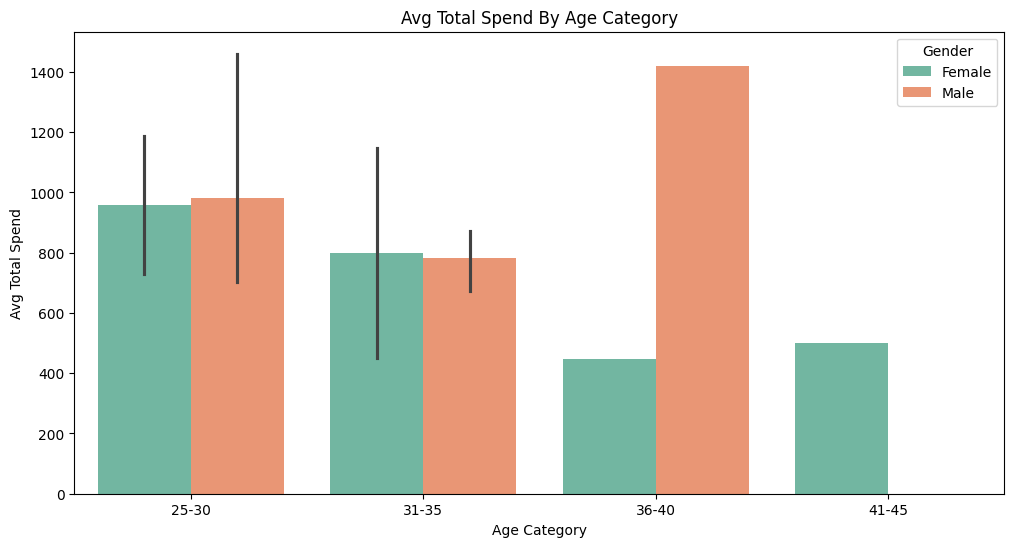

In [332]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Avg_totalSpend_age['Age Category'], y=Avg_totalSpend_age['Total Spend'], hue=Avg_totalSpend_age['Gender'], palette='Set2')
plt.ylabel('Avg Total Spend')
plt.title('Avg Total Spend By Age Category')
plt.show()

## Observation
1. The story demonstrates that men aged 36–40 possess the highest average total spend and could be a potentially vital revenue-generating segment on the online shopping platform.
2. Both men and women in the 25–30 age bracket (late 20s) evidence similar spending habits. This may well be a stage of lifestyle where people are likely to be single or have fewer money concerns, thus having more even purchasing habits.
3. Interestingly, females aged 31–35 (early 30s) appear to spend more than males of the same age. This might be influenced by factors such as household needs, personal care purchases, or increasing online shopping preferences — though further investigation would be required to confirm this.
4. Additionally, in the 41–45 age group, female users show higher spending compared to males. This could suggest a growing comfort with online platforms among older female users, but again, the exact reasons would need deeper demographic or behavioral analysis.
Insight: These patterns suggest that marketing strategies could be tailored to the high-spending male segment in their late 30s, while also tapping into the rising e-commerce interest among females in their early 30s and 40s through targeted campaigns, product personalization, or loyalty programs.

In [334]:
# Satisfaction Analysis: Investigate factors influencing customer satisfaction and identify areas for improvement.
customer_df['Satisfaction Level'].value_counts()

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

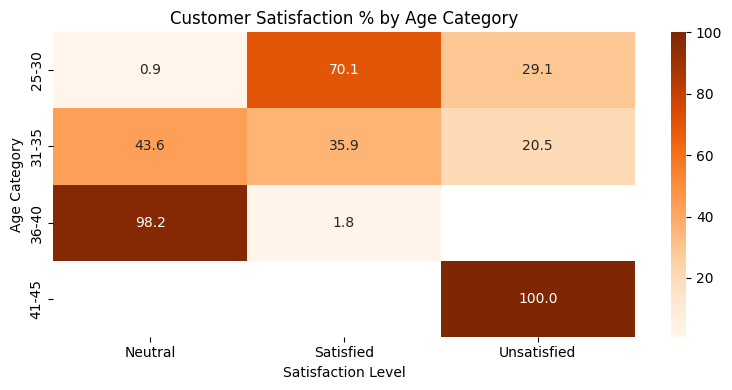

In [336]:
# Pivot for satisfaction % by age group
heatmap_data = customer_df.groupby(['Age Category', 'Satisfaction Level']).size().unstack()
heatmap_percent = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_percent, annot=True, cmap='Oranges', fmt=".1f")
plt.title('Customer Satisfaction % by Age Category')
plt.ylabel('Age Category')
plt.xlabel('Satisfaction Level')
plt.tight_layout()
plt.show()

## Observations and Insights
1. In the 41–45 age group, 100% of the customers—exclusively female—are unsatisfied with their purchases. This could indicate that the platform’s offerings or user experience aren't aligned with their needs. Improving product relevance and user support for this age group may enhance satisfaction.
2. In the 36–40 age group, where most users are male, the majority report a neutral satisfaction level, with only 1% expressing satisfaction. This suggests a lack of strong engagement or fulfillment, indicating a need to better meet expectations through improved product quality or personalization.
3. In the 31-35 age group, approx 45% people have neutral, 38% have satisifed and 20% have unsatisified level of satisfaction. This indicates balanced engagement but there is still a room to enhance satisfaction through targeted improvements in product variety, its description or service quality along with returns and exchanges
4. In the 25–30 age group, 70% of users are satisfied, while 30% are unsatisfied. This suggests that products generally meet expectations, but improvements in returns, exchanges, or product variety could further boost satisfaction.

In [338]:
# Promotion Strategy: Assess the impact of discounts on customer spending and tailor promotional strategies accordingly.
grouped = customer_df.groupby(['Gender', 'Discount Applied'])['Total Spend'].mean().reset_index()
grouped['Discount Applied'] = grouped['Discount Applied'].map({True: 'Discount Applied', False: 'No Discount'})

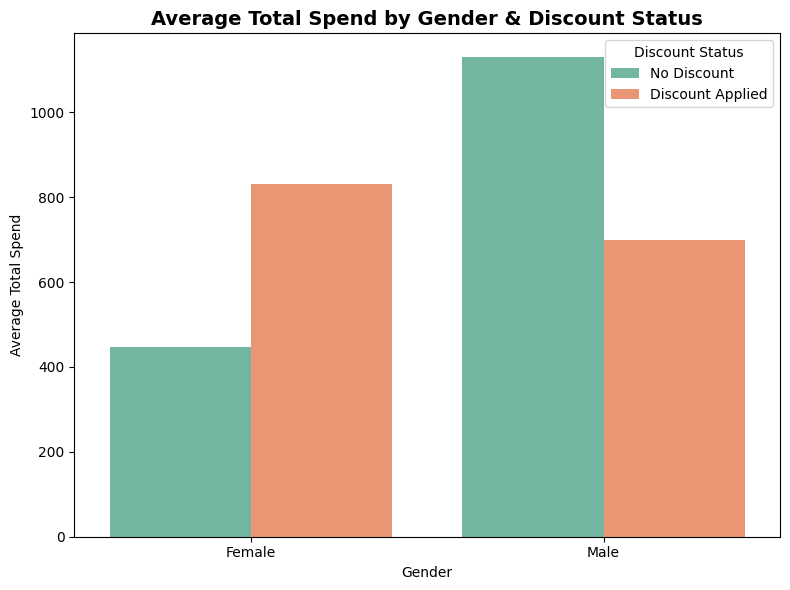

In [340]:
plt.figure(figsize=(8,6))
sns.barplot(data=grouped, x='Gender', y='Total Spend', hue='Discount Applied', palette='Set2')
plt.title("Average Total Spend by Gender & Discount Status", fontsize=14, weight='bold')
plt.ylabel("Average Total Spend")
plt.xlabel("Gender")
plt.legend(title="Discount Status")
plt.tight_layout()
plt.show()

## Observations and Insights
Based on gender, females who availed discounts spent an average of 800, which is higher than males who used discounts (700). However, among those who did not use discounts, males had the highest average total spend of 1100, while females spent significantly less at 450.
This suggests that discounts motivate female customers to spend more, whereas males tend to spend more regardless of discounts.
For Female Customers:
1. Introduce targeted discount campaigns (e.g., 10–20% off) to boost average order value.
2. Promote bundle deals or cashback offers through personalized email marketing.
3. Use limited-time offers to create urgency and drive conversions.
For Male Customers:
1. Focus on premier product recommendation rather than discounts
2. Highlight value, exclusivity and quality instead of price reductions
3. Encourage loyalty with membership reward programs instead of generic discounts

In [346]:
# Retention Strategies: Develop targeted retention strategies by understanding the time gap since the last purchase.
retention_pivot = customer_df.pivot_table(
    values='Days Since Last Purchase',
    index='City',
    aggfunc='mean'
).sort_values(by='Days Since Last Purchase', ascending=False)
retention_pivot

,Days Since Last Purchase
City,
Miami,45.500000
Chicago,40.465517
New York,24.593220
Houston,22.758621
Los Angeles,15.271186
San Francisco,11.172414


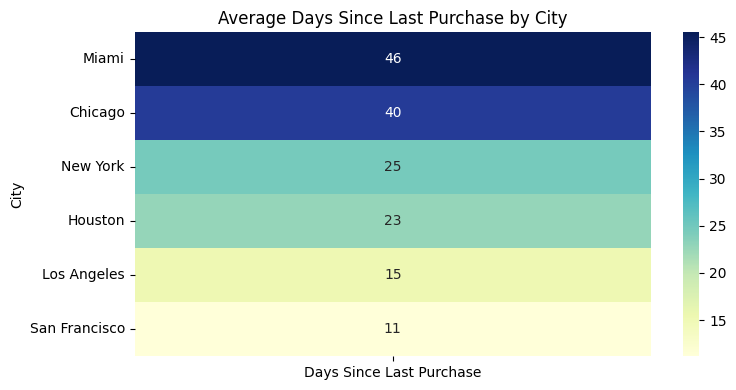

In [348]:
plt.figure(figsize=(8, 4))
sns.heatmap(retention_pivot, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Average Days Since Last Purchase by City')
plt.xlabel('')
plt.ylabel('City')
plt.tight_layout()
plt.show()

## Observations and Insights
1. Customers in Miami and Chicago have the highest average days since last purchase, indicating poor retention and low repeat engagement. To improve retention, implement win-back campaigns, personalized offers, and collect feedback to understand drop-off reasons.
2. Customers in Los Angeles and San Francisco show the lowest average days since last purchase, indicating strong repeat engagement and loyalty.
These cities can be leveraged for loyalty programs, referrals, and upselling strategies to further boost lifetime value.
3. Customers in New York and Houston fall in the mid-range for retention, showing moderate repeat engagement.
These segments offer potential for growth through targeted promotions and personalized engagement strategies.

## Summary
1. High-Spending Segments: San Francisco and New York customers displayed the highest mean total spend, which has good potential for premium product targeting and loyalty promotions in these two cities.
2. Age & Gender Insights: The highest spending group was 36–40-year-old males but displayed generally neutral satisfaction, whereas females aged 25–30 had the highest satisfaction level, implying that young females are an important loyal segment.
3. Satisfaction Issues: Women aged 41–45 were completely dissatisfied, indicating a product relevance or user experience gap for this age group — necessitating platform design adjustments or customized product categories.
4. Discount Strategy Effect: Discounts boosted expenditure for women (₹800 avg vs ₹450 without), but men spent more without discounts (₹1100), indicating men are less responsive to discounts and more to product value, whereas discounts suit female customers.
5. Retention Hotspots: Miami is highest days since last purchase, i.e., lowest retention, while LA & SF are lowest, i.e., highest repeat engagement. Retargeting campaigns must be directed more towards Miami.

## Strategic Recommendations
1. Increase product personalization for 41–45 age group.
2. Launch female-focused discount campaigns.
3. Implement retargeting ads & loyalty rewards in markets such as Miami to enhance retention.
4. Promote premium, non-discounted products to high-spending male segments in their late 30s.